In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [6]:
from helper import load_data, normalize_data

data = load_data()
data.shape

(272, 2)

### Initialize your cluster centers

In [7]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    
    np.random.seed(1)
    indices_centers=np.random.randint(0,data.shape[0],k)
    centers=data[indices_centers]
    
    return centers

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [8]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    distance_matrix=np.zeros( (data.shape[0],mu.shape[0]) )   #(num_samples,k)
    
    for i in range(data.shape[0]):
        for j in range(mu.shape[0]):
            
            distance_matrix[i][j]= np.linalg.norm(data[i]-mu[j])
    
    return distance_matrix

#### Update k-means parameters

In [9]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    distance_matrix=build_distance_matrix(data, mu_old)
    assignments=np.argmin(distance_matrix, axis=1).reshape((-1,1))  #(num_samples,1)
    
    sums= np.zeros((distance_matrix.shape[1],data.shape[1]))   #shape of (k,num_features)
    count= np.zeros((distance_matrix.shape[1],1))                #shape of (k,1)
    
    for sample,k in zip(data,assignments):
        sums[k] +=sample
        count[k] +=1
    
    mu=sums/count     #(k,num_features)/(k,1) we use broadcasting
    
    losses= np.zeros((data.shape[0],1))
    
    for i in range(data.shape[0]): 
        k=assignments[i]
        losses[i]= np.linalg.norm(data[i]-mu[k])
    
    return losses,assignments,mu

#### Play with k-means

In [22]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 3
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

KeyboardInterrupt: 

## Using k-means for image compresson

#### load image

In [11]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [20]:
def preprocess_image(original_image):
    """preprocess the image."""
    processed_image=np.zeros( (original_image.shape[0]*original_image.shape[1],3) )
    
    for i in range(original_image.shape[0]):
        for j in range(original_image.shape[1]):
            processed_image[i*original_image.shape[1]+j]=original_image[i,j]
    
    print(
        "Current image: the shape of image={s}, the data type={dt}.".format(
            s=processed_image.shape, dt=processed_image.dtype))
        
    return processed_image

processed_image = preprocess_image(original_image)

Current image: the shape of image=(230400, 3), the data type=float64.


The current iteration of kmeans is: 0, the average loss is 48.11258213072715.
The current iteration of kmeans is: 10, the average loss is 36.742115855562226.
The current iteration of kmeans is: 20, the average loss is 36.77692950704341.
The current iteration of kmeans is: 30, the average loss is 36.782269264200586.
The current iteration of kmeans is: 40, the average loss is 36.7829848094104.


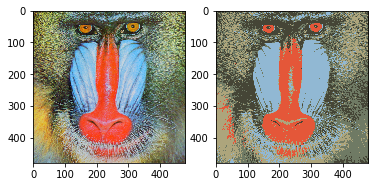

<Figure size 432x288 with 0 Axes>

In [23]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    mu_old = initialize_clusters(processed_image, k)
    
    # init some empty lists to store the result.
    loss_list = []
    
    # start the kmeans
    for iter in range(max_iter):
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)

        if iter % 10 == 0:
            print(
                "The current iteration of kmeans is: {i}, the average loss is {l}.".format(
                    i=iter, l=average_loss))
        
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break

        # update mu
        mu_old = mu
        
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)